# Data Inspection / Analysis
### Input: DataArray mit lat, lon, time

    1) Map erstellen
    2) m.plot(xar, save_to_path=False)


### Output: Plots im jupyter notebook von
- mean
- std
- spatial covariance
- histogram distribution

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import seaborn as sb
from dask.diagnostics import ProgressBar

from aux.plot import Map

In [5]:
xar = xr.open_mfdataset('../data/usa/*precip*.nc')

In [6]:
xar

<xarray.Dataset>
Dimensions:    (latitude: 101, longitude: 221, time: 13880)
Coordinates:
  * longitude  (longitude) float32 -125.0 -124.75 -124.5 ... -70.5 -70.25 -70.0
  * latitude   (latitude) float32 50.0 49.75 49.5 49.25 ... 25.5 25.25 25.0
  * time       (time) datetime64[ns] 1980-01-01T23:00:00 ... 2017-12-31T23:00:00
Data variables:
    lsp        (time, latitude, longitude) float32 dask.array<shape=(13880, 101, 221), chunksize=(31, 101, 221)>
    cp         (time, latitude, longitude) float32 dask.array<shape=(13880, 101, 221), chunksize=(31, 101, 221)>
Attributes:
    CDI:          Climate Data Interface version 1.6.4rc4 (http://code.zmaw.d...
    Conventions:  CF-1.6
    history:      Tue May 28 07:31:19 2019: cdo -b 32 daysum /home/srvx11/leh...
    CDO:          Climate Data Operators version 1.6.4rc7 (http://code.zmaw.d...

## Projections
The Map() configuration object may be used with all cartopy CRS (coordinate reference system).
To plot a xarray.DataArray `xar`, just use `m.plot(xar)`. `m.plot` returns matplotlib's figure and axis objects.

Example CRSs:
- ccrs.LambertConformal(central_longitude=-95, central_latitude=45)
- ccrs.Orthographic(-110, 35)
- ccrs.PlateCarree()

In [7]:
m = Map(figure_kws=dict(figsize=(15,10)))

## Getting an overview over the dataset
### Mean, Std, Skewness, 1/99 percentile and distribution density plot

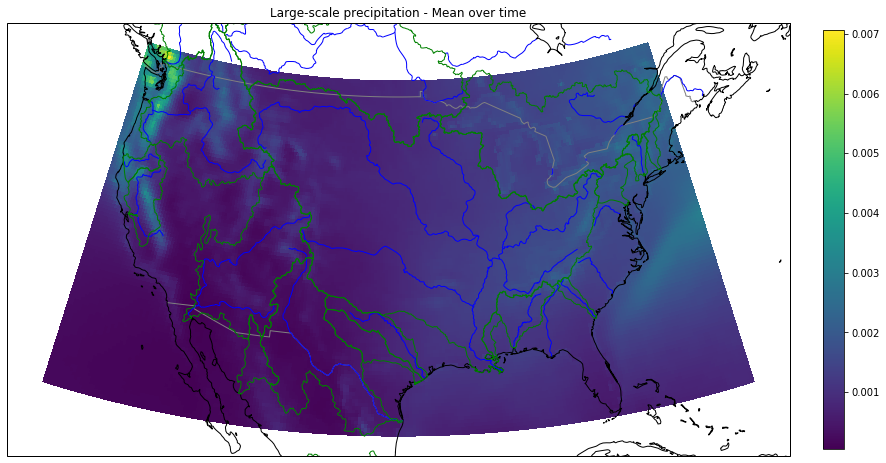

In [8]:
with ProgressBar():
    fig, ax = m.plot(xar['lsp'].mean('time'))
    ax.set_title('Large-scale precipitation - Mean over time')

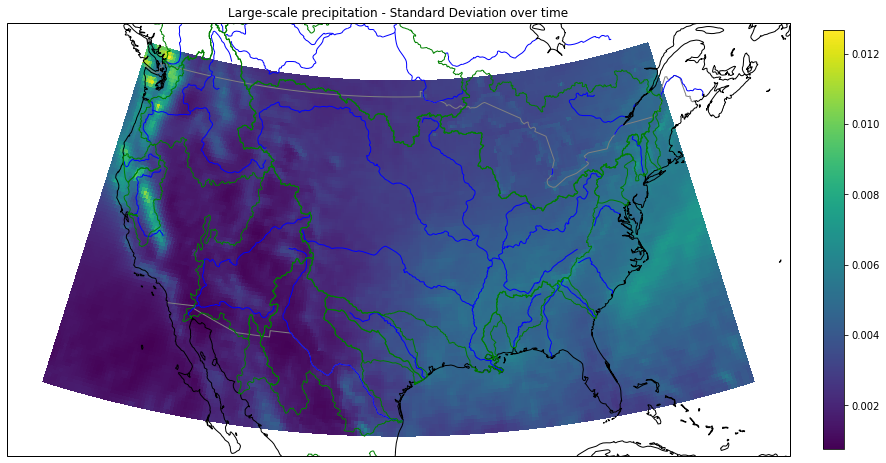

In [9]:
with ProgressBar():
    fig, ax = m.plot(xar['lsp'].std('time'))
    ax.set_title('Large-scale precipitation - Standard Deviation over time')

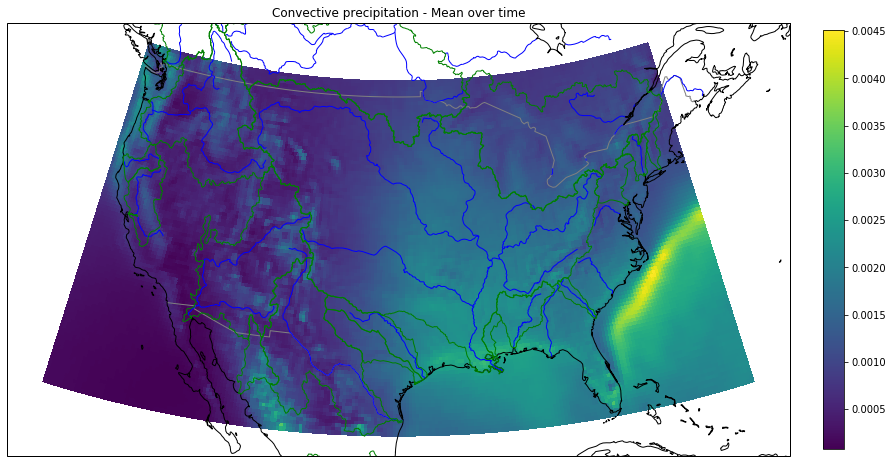

In [10]:
with ProgressBar():
    fig, ax = m.plot(xar['cp'].mean('time'))
    ax.set_title('Convective precipitation - Mean over time')

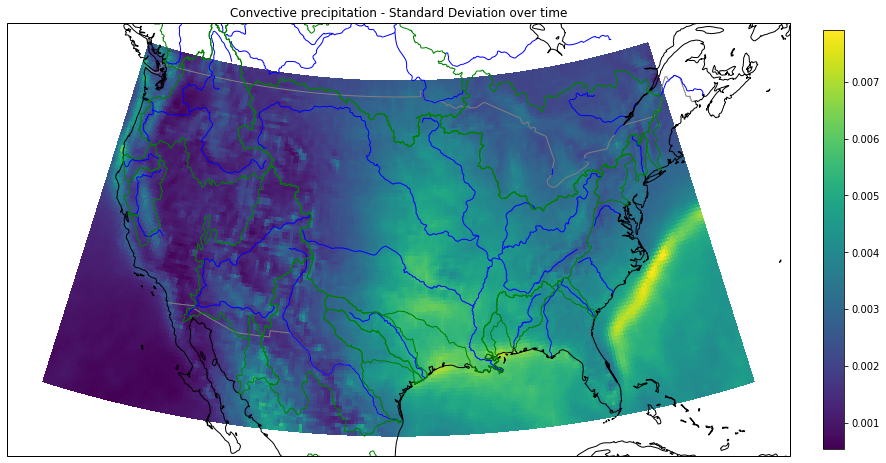

In [11]:
with ProgressBar():
    fig, ax = m.plot(xar['cp'].std('time'))
    ax.set_title('Convective precipitation - Standard Deviation over time')

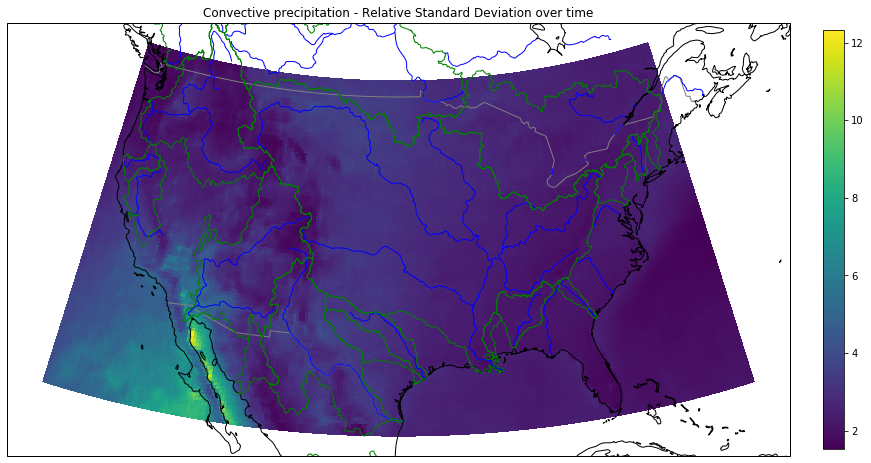

In [12]:
with ProgressBar():
    fig, ax = m.plot(xar['cp'].std('time')/xar['cp'].mean('time'))
    ax.set_title('Convective precipitation - Relative Standard Deviation over time')

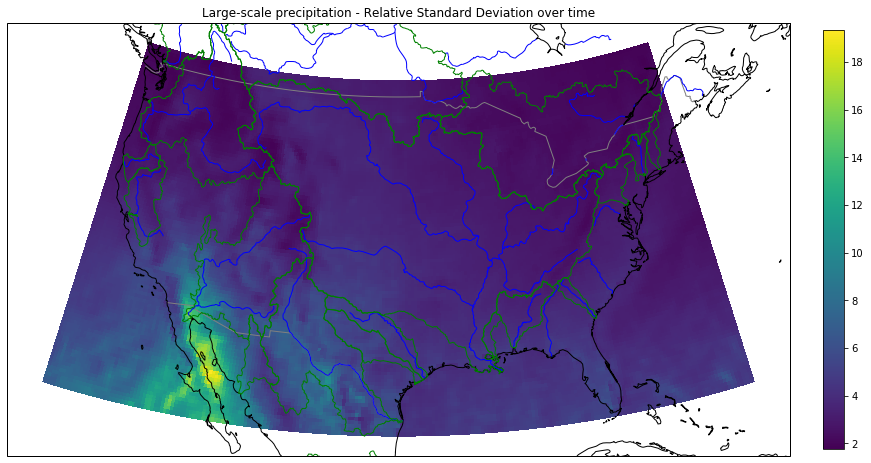

In [13]:
with ProgressBar():
    fig, ax = m.plot(xar['lsp'].std('time')/xar['lsp'].mean('time'))
    ax.set_title('Large-scale precipitation - Relative Standard Deviation over time')

## Spatial correlations

Text

In [14]:
anom = xar - xar.mean('time')
da = anom['lsp']

Calling `xarray`'s plotting routines without projection yields nice plots too, but they may be distorted if your spatial domain is not of quadratic shape:

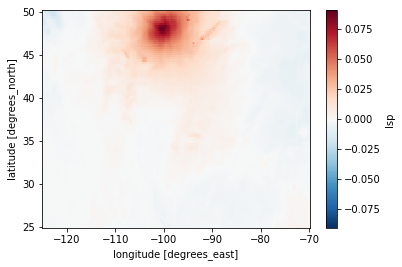

In [15]:
point = dict(latitude=48, longitude=-100)
cov = da.loc[point].dot(da)
cov.plot.pcolormesh()

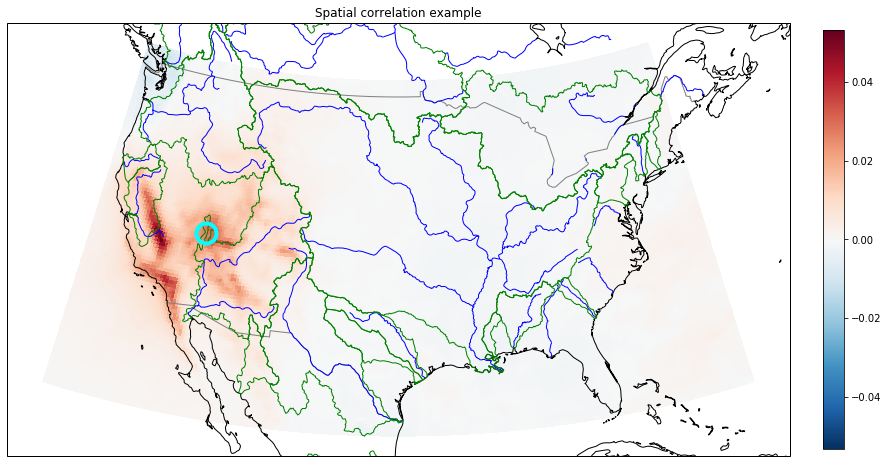

In [16]:
points = [dict(latitude=48, longitude=-100),
          dict(latitude=47, longitude=-80),
          dict(latitude=40, longitude=-115),
          dict(latitude=38, longitude=-115),
          dict(latitude=38, longitude=-115)
         ]

for point in points:
    cov = da.loc[point].dot(da)
    with ProgressBar():
        fig, ax = m.plot(cov)
        m.plot_point(ax, lat=point['latitude'], lon=point['longitude'])
        ax.set_title('Spatial correlation example')

# Dataset Variable's Distribution

using seaborn? or too many values ("big data")
-> probably "bokeh" module

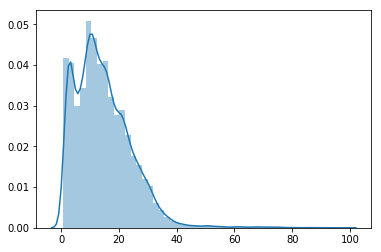

In [20]:
data = xar['lsp'].sum('time').values.ravel()
sb.distplot(data)

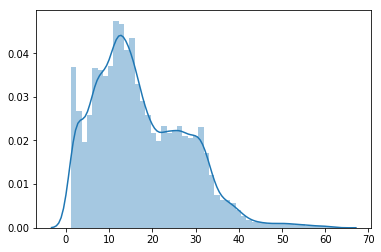

In [21]:
data = xar['cp'].sum('time').values.ravel()
sb.distplot(data)